In [1]:
using Images, Colors
using TestImages

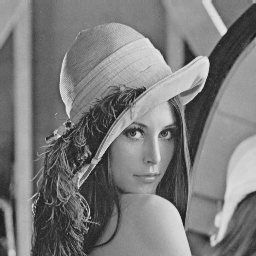

In [2]:
img = testimage("lena_gray") |> x->convert(Array{Float64,2}, x.data);
convert(Image, img)

In [3]:
function corrupt(img, percentage) 
    @assert 0<= percentage <= 100
    x = floor(Int, (100-percentage)*length(img)/100)
    a = [zeros(length(img)-x); ones(x)] |> shuffle |> x->reshape(x, size(img))
    img_corr = img .* a
end

corrupt (generic function with 1 method)

In [4]:
function is_boundary(img, i,j)
    img[i,j] > eps() && return false
    for k in -1:1, l in -1:1
        if 1<= i+k <= size(img, 1) && 1<= j+l <= size(img, 1)
            img[i+k, j+l] > eps() && return true
        end
    end
    return false
end

is_boundary(img) = Bool[is_boundary(img,i,j) for i in 1:size(img,1), j in 1:size(img,2)]

is_boundary (generic function with 2 methods)

In [5]:
function avr_nine_pts(img, i, j) 
    n = 0
    s = 0
    for k in -1:1, l in -1:1
        if 1<= i+k <= size(img, 1) && 1<= j+l <= size(img, 1)
            if img[i+k, j+l] > eps() 
                n += 1
                s += img[i+k, j+l] 
            end
        end
    end
    return s/n
end

avr_nine_pts (generic function with 1 method)

In [6]:
function replace_boundary(img_corr, i, j)
    if is_boundary(img_corr, i,j)
         return avr_nine_pts(img_corr, i, j)
    else
        return img_corr[i,j]
    end
end

averaging_step(img_corr) = eltype(img_corr)[ replace_boundary(img_corr, i, j) for i in 1:size(img_corr,1), j in 1:size(img_corr,2)]


averaging_step (generic function with 1 method)

In [7]:
function simplest_averaging(img_corr)
    img_tmp = copy(img_corr)
    while true
        bd_pts = sum(is_boundary(img_tmp))/prod(size(img_tmp))*100 
        println("Boundary points: ", round(bd_pts, 1))
        if bd_pts > 0
            img_tmp = averaging_step(img_tmp)
        else
            return img_tmp
        end
    end
end

simplest_averaging (generic function with 1 method)

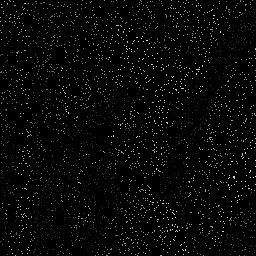

In [10]:
perc = 95
img_corr = corrupt(img, perc)
convert(Image, img_corr)

Boundary points: 31.7
Boundary points: 34.5
Boundary points: 19.6
Boundary points: 7.1
Boundary points: 1.7
Boundary points: 0.3
Boundary points: 0.0
Boundary points: 0.0
Boundary points: 0.0


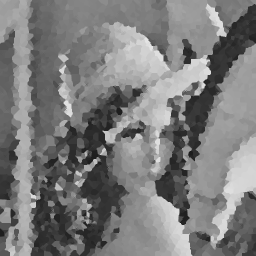

In [11]:
img_final = simplest_averaging(img_corr)
convert(Image, img_final)